In [18]:
import numpy as np
from scipy.integrate import solve_ivp

In [1]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


Define equation of motion as a system of first order differential equations:

\dot x = u
\dot u = \gamma cos(\omega t) - (\delta u + \alpha x + \beta x^3)

In [1]:
class DuffingOscillator():
    def __init__(self):
        self.history = np.array([0,0,0,0]) # t, x, u, n,  initial conditions
        self.greeks = np.array([1,1,1,1,1]) # alpha, beta, gamma, delta, omega
        
    def step():
        
        

SyntaxError: unexpected EOF while parsing (<ipython-input-1-80689571f06f>, line 7)

In [22]:
gamma = 0.25
beta = 0.5
alpha  = 1
gamma = 2.5
delta = 1
omega = 1


def duffing(t, xu):
    x = xu[0]
    u = xu[1]
    x_dot = u
    u_dot = gamma*np.cos(omega * t) - (delta*u + alpha*x + beta*x**3)
    return np.array(x_dot, u_dot)
    

In [23]:
output = solve_ivp(duffing, 0, np.array([0,0.5]), method='RK45')

TypeError: 'int' object is not subscriptable

In [17]:
print(output.y)

[0.  0.5]


In [ ]:
class RK45():
    def __init__(self):
        self.initial = np.array([0,0])
        self.gamma = 0.25
        self.beta = 0.5
        self.alpha  = 1
        self.gamma = 2.5
        self.delta = 1
        self.omega = 1
        
    def _funct(self, t, x):
        return np.array([x[1], self.gamma * np.cos(self.omega * t) - (self.delta * u + self.alpha*x + self.beta * x**3)])
    def step(self):
        

In [38]:
import numpy as np

def rkf( f, a, b, x0, tol, hmax, hmin ):

    a2  =   2.500000000000000e-01  #  1/4
    a3  =   3.750000000000000e-01  #  3/8
    a4  =   9.230769230769231e-01  #  12/13
    a5  =   1.000000000000000e+00  #  1
    a6  =   5.000000000000000e-01  #  1/2

    b21 =   2.500000000000000e-01  #  1/4
    b31 =   9.375000000000000e-02  #  3/32
    b32 =   2.812500000000000e-01  #  9/32
    b41 =   8.793809740555303e-01  #  1932/2197
    b42 =  -3.277196176604461e+00  # -7200/2197
    b43 =   3.320892125625853e+00  #  7296/2197
    b51 =   2.032407407407407e+00  #  439/216
    b52 =  -8.000000000000000e+00  # -8
    b53 =   7.173489278752436e+00  #  3680/513
    b54 =  -2.058966861598441e-01  # -845/4104
    b61 =  -2.962962962962963e-01  # -8/27
    b62 =   2.000000000000000e+00  #  2
    b63 =  -1.381676413255361e+00  # -3544/2565
    b64 =   4.529727095516569e-01  #  1859/4104
    b65 =  -2.750000000000000e-01  # -11/40

    r1  =   2.777777777777778e-03  #  1/360
    r3  =  -2.994152046783626e-02  # -128/4275
    r4  =  -2.919989367357789e-02  # -2197/75240
    r5  =   2.000000000000000e-02  #  1/50
    r6  =   3.636363636363636e-02  #  2/55

    c1  =   1.157407407407407e-01  #  25/216
    c3  =   5.489278752436647e-01  #  1408/2565
    c4  =   5.353313840155945e-01  #  2197/4104
    c5  =  -2.000000000000000e-01  # -1/5

    t = a
    x = np.array(x0)
    h = hmax

    T = np.array( [t] )
    X = np.array( [x] )
    
    while t < b:

        if t + h > b:
            h = b - t

        k1 = h * f( x, t )
        k2 = h * f( x + b21 * k1, t + a2 * h )
        k3 = h * f( x + b31 * k1 + b32 * k2, t + a3 * h )
        k4 = h * f( x + b41 * k1 + b42 * k2 + b43 * k3, t + a4 * h )
        k5 = h * f( x + b51 * k1 + b52 * k2 + b53 * k3 + b54 * k4, t + a5 * h )
        k6 = h * f( x + b61 * k1 + b62 * k2 + b63 * k3 + b64 * k4 + b65 * k5, \
                    t + a6 * h )

        r = abs( r1 * k1 + r3 * k3 + r4 * k4 + r5 * k5 + r6 * k6 ) / h
        if len( np.shape( r ) ) > 0:
            r = max( r )
        if r <= tol:
            t = t + h
            x = x + c1 * k1 + c3 * k3 + c4 * k4 + c5 * k5
            T = np.append( T, t )
            X = np.append( X, [x], 0 )

        h = h * min( max( 0.84 * ( tol / r )**0.25, 0.1 ), 4.0 )

        if h > hmax:
            h = hmax
        elif h < hmin:
            raise RuntimeError("Error: Could not converge to the required tolerance %e with minimum stepsize  %e." % (tol,hmin))
            break

    return ( T, X )

Execution time: 0.54433274269104 seconds


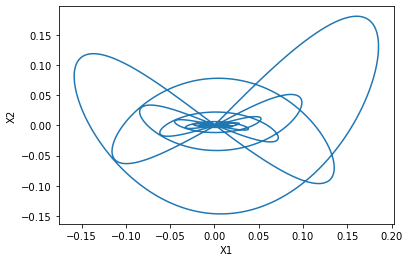

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import time
start_time = time.time()

w = 1
b = .1

#@numba.jit()
def V(u,t):
    x1,dx1, x2, dx2=u
    ddx1=-w**2 * x1 -b * dx1
    ddx2=-(w+0.5)**2 * x2 -(b+0.1) * dx2
    return np.array([dx1,ddx1,dx2,ddx2])


#@numba.jit()
def rk4(f, u0, t0, tf , n):
    t = np.linspace(t0, tf, n+1)
    u = np.array((n+1)*[u0])
    h = t[1]-t[0]
    for i in range(n):
        k1 = h * f(u[i], t[i])    
        k2 = h * f(u[i] + 0.5 * k1, t[i] + 0.5*h)
        k3 = h * f(u[i] + 0.5 * k2, t[i] + 0.5*h)
        k4 = h * f(u[i] + k3, t[i] + h)
        u[i+1] = u[i] + (k1 + 2*(k2 + k3) + k4) / 6
    return u, t

u, t  = rk4(V,np.array([0,0.2,0,0.3]) ,0,100, 20000)

print("Execution time:",time.time() - start_time, "seconds")
x1,dx1,x2,dx2 = u.T
plt.plot(x1,x2)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [39]:
T, X = rkf( f=V, a=0, b=100, x0=[0,0.2], tol=1e-6, hmax=1e1, hmin=1e-16 )

Execution time: 0.11114096641540527 seconds


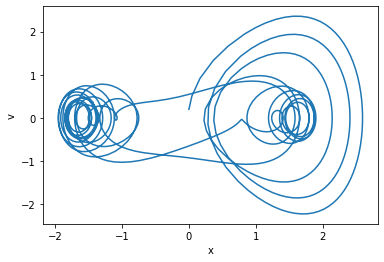

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import numba
import time
start_time = time.time()

w = 1
b = .1
gamma = 0.25
beta = 0.5
alpha  = .1
gamma = 2.5
delta = .1
omega = 0.1


#@numba.jit()
"""
def V(u,t):
    x1,dx1, x2, dx2=u
    ddx1=-w**2 * x1 -b * dx1
    ddx2=-(w+0.5)**2 * x2 -(b+0.1) * dx2
    return np.array([dx1,ddx1,dx2,ddx2])
"""
def V(u,t):
    x, dx = u
    ddx=  gamma * np.cos(omega * t) - (delta * dx + alpha*x + beta * x**3)
    return np.array([dx,ddx])



#@numba.jit()
def rk4(f, u0, t0, tf , n):
    t = np.linspace(t0, tf, n+1)
    u = np.array((n+1)*[u0])
    h = t[1]-t[0]
    for i in range(n):
        k1 = h * f(u[i], t[i])    
        k2 = h * f(u[i] + 0.5 * k1, t[i] + 0.5*h)
        k3 = h * f(u[i] + 0.5 * k2, t[i] + 0.5*h)
        k4 = h * f(u[i] + k3, t[i] + h)
        u[i+1] = u[i] + (k1 + 2*(k2 + k3) + k4) / 6
    return u, t

t, u  = rkf( f=V, a=0, b=100, x0=[0,0.2], tol=1e-6, hmax=1e1, hmin=1e-16 )

print("Execution time:",time.time() - start_time, "seconds")
x1,dx1 = u.T
plt.plot(x1, dx1)
plt.xlabel('x')
plt.ylabel('v')
plt.show()

In [ ]:
kappa1 = 1
kappa2 = 2
beta1 = 0.5
beta2 = 0.75


def V(u,t):
    x1, dx1, x2, dx2 = u
    ddx1 = 
    ddx=  gamma * np.cos(omega * t) - (delta * dx + alpha*x + beta * x**3)
    return np.array([dx,ddx])

FPUT System:
Spring dimer lattice with alternating, non-linear, spring constants.

F1(r) = kappa1*r + beta1*r^2 + order(r^3)
F2(r) = kappa2*r + beta2*r^2 + order(r^3)



In [ ]:
def Fj(u):
    r, j = u
    return kappa[j%2]*r + beta[j%2]*r**2

def FPUT(u, t):
    